In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import resample

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
X = pd.read_csv("X_final.csv") 
y = pd.read_csv("Y_data.csv")

In [14]:
#Vemos que los datos están desequilibrados
y["Exited"].value_counts()

0    7677
1    1949
Name: Exited, dtype: int64

In [15]:
#Partimos los datos en entrenamiento y test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, 
                                                    random_state = 42)

In [16]:
#Equilibramos los datos
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.Exited.ravel())

In [17]:
X_train_res.shape, y_train_res.shape

((12316, 6), (12316,))

In [55]:
#modelo (DNN)

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(128, input_shape=(6,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation = "relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [56]:
history = model.fit(X_train_res, y_train_res, 
                    epochs = 100, verbose = 2)

Epoch 1/100
385/385 - 1s - loss: 0.5278 - accuracy: 0.7368 - 1s/epoch - 3ms/step
Epoch 2/100
385/385 - 1s - loss: 0.4903 - accuracy: 0.7614 - 1s/epoch - 3ms/step
Epoch 3/100
385/385 - 1s - loss: 0.4838 - accuracy: 0.7665 - 1s/epoch - 3ms/step
Epoch 4/100
385/385 - 1s - loss: 0.4803 - accuracy: 0.7675 - 1s/epoch - 3ms/step
Epoch 5/100
385/385 - 1s - loss: 0.4771 - accuracy: 0.7709 - 1s/epoch - 3ms/step
Epoch 6/100
385/385 - 1s - loss: 0.4722 - accuracy: 0.7703 - 1s/epoch - 3ms/step
Epoch 7/100
385/385 - 1s - loss: 0.4708 - accuracy: 0.7729 - 1s/epoch - 3ms/step
Epoch 8/100
385/385 - 1s - loss: 0.4695 - accuracy: 0.7748 - 1s/epoch - 3ms/step
Epoch 9/100
385/385 - 1s - loss: 0.4674 - accuracy: 0.7753 - 1s/epoch - 3ms/step
Epoch 10/100
385/385 - 1s - loss: 0.4647 - accuracy: 0.7766 - 1s/epoch - 3ms/step
Epoch 11/100
385/385 - 2s - loss: 0.4613 - accuracy: 0.7805 - 2s/epoch - 5ms/step
Epoch 12/100
385/385 - 1s - loss: 0.4649 - accuracy: 0.7780 - 1s/epoch - 4ms/step
Epoch 13/100
385/385 - 2s

In [59]:
#Tenemos una precisión de un 77.46%
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7913


[0.4378404915332794, 0.7912772297859192]

In [60]:
acc = history.history["accuracy"]
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)

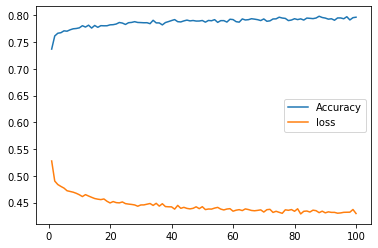

In [61]:
#Hacemos un plot de la función de coste y de la precisión
import matplotlib.pyplot as plt

plt.plot(epochs, acc, label = "Accuracy")
plt.plot(epochs, loss, label = "loss")
plt.legend()
plt.show()

Como modelo en vez de una red neuronal profunda podriamos haber utilizado una regresión logística, un SVM, un randomforest

In [62]:
y_proba = model.predict(X_test)
y_pred = np.round(y_proba)

61/61 [==============================] - 0s 1ms/step


In [63]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)


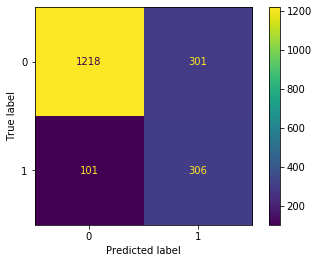

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_plot = ConfusionMatrixDisplay(conf)
cm_plot.plot()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1519
           1       0.50      0.75      0.60       407

    accuracy                           0.79      1926
   macro avg       0.71      0.78      0.73      1926
weighted avg       0.83      0.79      0.80      1926



Lo que más nos interesaba es tener un buen recall en la clase de clientes que abandonan y tener menor error tipo 1 que tipo 2.